### MPG Data Discovery
* https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Linkten csv okuma

In [24]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 delimiter="\s+",
                 header=None,
                 names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"],
                 index_col="car name"
                )

#
df.shape #(398, 8)
df.columns
df.index

#
len(df.index) #398
len(set(df.index)) #305 benzersiz araç
len(df.index.value_counts()) #305
df.index.nunique() #305

#
set(df.cylinders) #silindirler {3, 4, 5, 6, 8}

#
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1


In [26]:
#null var mı?
df.isna().any().any() #tabloda hiç bull yok.

False

In [30]:
#veri tiplerine bakalm
#df.info() #horsepower alanı neden object?

df.describe().T #sayısal alanlarla ilgili istatistik.

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [34]:
#mercedes geçen etiketler.
df.filter(like="mercedes",axis=0)

#belli bir indexi
df.loc[ ["mercedes-benz 280s","mercedes benz 300d"] ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
mercedes-benz 280s,16.5,6,168.0,120.0,3820.0,16.7,76,2
mercedes benz 300d,25.4,5,183.0,77.00,3530.0,20.1,79,2


#### horsepowera odaklanalım

In [47]:
pd.options.display.max_rows= 10#None

df.horsepower.value_counts()

#floata dönüşür mü?
#-----------
def isFloat(deger):
    try:
        deger = float(deger)
    except:
        return False
    else:
        return True    
#-----------

df.horsepower.map(isFloat) #False olarak floata dönüşemiyor.
floataDonusmeyenSatirlar = df.loc[~df.horsepower.map(isFloat),"horsepower"]
floataDonusmeyenSatirlar.value_counts()

floataDonusmeyenSatirlar

car name
ford pinto              ?
ford maverick           ?
renault lecar deluxe    ?
ford mustang cobra      ?
renault 18i             ?
amc concord dl          ?
Name: horsepower, dtype: object

#### ? olanlara Ortalama basalım

In [58]:
#df.horsepower.dtype

hp_mean = df[df.horsepower.map(isFloat)].horsepower.astype(float).mean()
hp_mean

#------------
#? olanlar
df.query("horsepower == '?'").horsepower
df.loc[~df.horsepower.map(isFloat),"horsepower"] = hp_mean

In [60]:
df = df.astype({"horsepower":"float"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 44.1+ KB


### Gruplama ve Görselleştirme

In [63]:
my_mpg = df.groupby(by=["model year"]).agg({"mpg":["max","min","mean","count"]})
my_mpg.head()

mpg                       
             max   min       mean count
model year                             
70          27.0   9.0  17.689655    29
71          35.0  12.0  21.250000    28
72          28.0  11.0  18.714286    28
73          29.0  11.0  17.100000    40
74          32.0  13.0  22.703704    27

#### Pandas ile görselleştirelim

<AxesSubplot:xlabel='model year'>

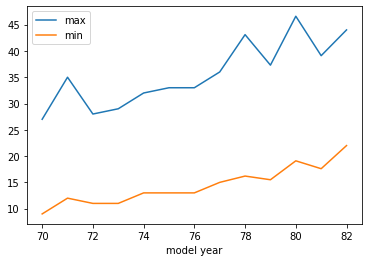

In [77]:
df_ozet = my_mpg.loc[:, ("mpg",["max","min"])].mpg
df_ozet.plot(y=["max","min"]) #x ekseni varsayılan olarak satır etiketidir

<AxesSubplot:xlabel='weight', ylabel='mpg'>

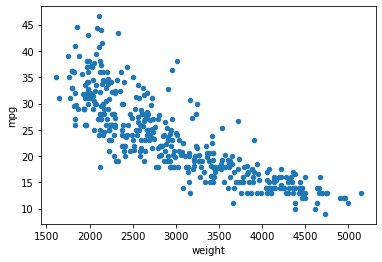

In [82]:
#df.plot(x="weight",y="mpg", kind="scatter")
df.plot.scatter(x="weight",y="mpg")

#### maptlotlib üzerinden görselleştirelim

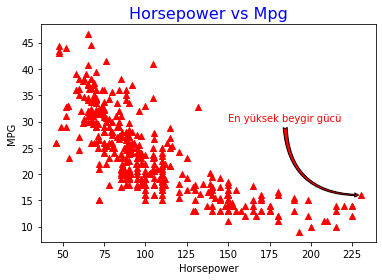

In [100]:
plt.scatter(x=df.horsepower, y=df.mpg, color="red", marker="^")

plt.title("Horsepower vs Mpg", fontsize=16, color="Blue")
plt.xlabel("Horsepower")
plt.ylabel("MPG")

#text ekleyelim
plt.annotate("En yüksek beygir gücü",
             xytext=(150,30),
             xy=(230, 16),
             arrowprops={"facecolor":"red", "arrowstyle":"fancy","connectionstyle":"angle3"},
             color="red"
            )

plt.show()

In [104]:
my_mpg = my_mpg.reset_index()
my_mpg.head(2)

model year   mpg                       
               max   min       mean count
0         70  27.0   9.0  17.689655    29
1         71  35.0  12.0  21.250000    28

<BarContainer object of 13 artists>

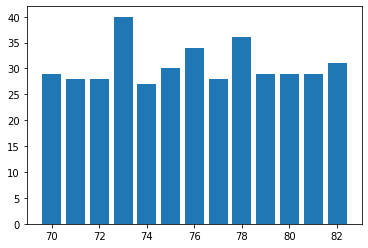

In [105]:
#hangi yılda kaç adet araç var.
plt.bar(x=my_mpg["model year"], height=my_mpg.mpg["count"])

#### subplot ekleme

In [109]:
gr = df.groupby(by="cylinders").agg({"mpg":"count"}).rename(columns={"mpg":"adet"}).reset_index()
gr

,cylinders,adet
0,3,4
1,4,204
2,5,3
3,6,84
4,8,103


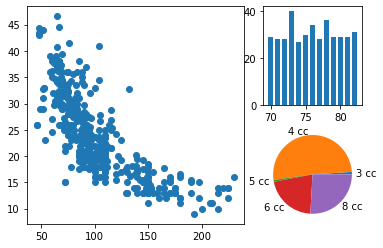

In [117]:
fig = plt.figure()

#
sp_15 = fig.add_subplot(2,3,(1,5))
sp_3 = fig.add_subplot(2,3,3)
sp_6 = fig.add_subplot(2,3,6)

#
sp_15.scatter(x=df.horsepower, y=df.mpg)
sp_3.bar(x=my_mpg["model year"], height=my_mpg.mpg["count"])
sp_6.pie(x=gr.adet, labels=["{} cc".format(c) for c in gr.cylinders])

plt.show()